In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
import matplotlib.dates as mdates
import seaborn as sns

#load data
df2018 = pd.read_csv('Data\datos201812.csv', sep=';') 
df2019 = pd.read_csv('Data\datos201912.csv', sep=';')
df2020 = pd.read_csv('Data\datos202012.csv', sep=';')
df2021 = pd.read_csv('Data\datos202112.csv', sep=';')
df2022 = pd.read_csv('Data\datos202212.csv', sep=';')
df2023 = pd.read_csv('Data\datos202312.csv', sep=';')

#Dictionary with codes corresponding to that chemichal abbreviation
MagCodes = {
    'Code': [1, 6, 7, 8, 9, 10, 12, 14, 20, 30, 35, 37, 38, 39, 42, 43, 44, 431],
    'Mag': ['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN', 'EBE', 'MXY', 'PXY', 'OXY', 'TCH', 'CH4', 'NMHC', 'MPX']
} 
DfMagCodes = pd.DataFrame(MagCodes)

#Replace codes with abbreviations
df2018['MAGNITUD'] = df2018['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2018['MAGNITUD'])
df2019['MAGNITUD'] = df2019['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2019['MAGNITUD'])
df2020['MAGNITUD'] = df2020['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2020['MAGNITUD'])
df2021['MAGNITUD'] = df2021['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2021['MAGNITUD'])
df2022['MAGNITUD'] = df2022['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2022['MAGNITUD'])
df2023['MAGNITUD'] = df2023['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2023['MAGNITUD'])
#Concatenate all dataframes
df_all = pd.concat([df2018, df2019, df2020, df2021, df2022, df2023], ignore_index=True)

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juanm\AppData\Local\Temp\ipykernel_17956\3880831111.py:10: SyntaxWarning: invalid escape sequence '\d'
  df2018 = pd.read_csv('Data\datos201812.csv', sep=';')
C:\Users\juanm\AppData\Local\Temp\ipykernel_17956\3880831111.py:11: SyntaxWarning: invalid escape sequence '\d'
  df2019 = pd.read_csv('Data\datos201912.csv', sep=';')
C:\Users\juanm\AppData\Local\Temp\ipykernel_17956\38

In [2]:
#Show the dataframe head
df_all.head(10)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,SO2,28079004_1_38,2018,1,1.0,V,1.0,...,2.0,V,2.0,V,6.0,V,5.0,V,6.0,V
1,28,79,4,SO2,28079004_1_38,2018,2,5.0,V,3.0,...,3.0,V,2.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,SO2,28079004_1_38,2018,3,1.0,V,2.0,...,2.0,V,4.0,V,2.0,V,2.0,V,2.0,V
3,28,79,4,SO2,28079004_1_38,2018,4,2.0,V,3.0,...,1.0,V,2.0,V,2.0,V,2.0,V,0.0,N
4,28,79,4,SO2,28079004_1_38,2018,5,2.0,V,2.0,...,2.0,V,2.0,V,3.0,V,2.0,V,2.0,V
5,28,79,4,SO2,28079004_1_38,2018,6,3.0,V,2.0,...,2.0,V,2.0,V,2.0,V,2.0,V,0.0,N
6,28,79,4,SO2,28079004_1_38,2018,7,2.0,V,2.0,...,7.0,V,6.0,V,6.0,V,7.0,V,7.0,V
7,28,79,4,SO2,28079004_1_38,2018,8,9.0,V,8.0,...,10.0,V,10.0,V,9.0,V,9.0,V,9.0,V
8,28,79,4,SO2,28079004_1_38,2018,9,10.0,V,9.0,...,9.0,V,10.0,V,10.0,V,10.0,V,0.0,N
9,28,79,4,SO2,28079004_1_38,2018,10,10.0,V,11.0,...,10.0,V,61.0,N,610.0,N,9.0,V,10.0,V


In [3]:
#Make a list of columns for each day (V: validation D: day)
D_cols = [f'D{day:02d}' for day in range(1, 32)]
V_cols = [f'V{day:02d}' for day in range(1, 32)]

#Clean data by replacing 'N' in validation columns with NaN in corresponding day columns
df_all_cleaned = df_all.copy()
for d_col, v_col in zip(D_cols, V_cols):
    mask = df_all_cleaned[v_col] == 'N'
    df_all_cleaned.loc[mask, d_col] = np.nan

#Make date column
df_all_cleaned['FECHA'] = df_all_cleaned['ANO'].astype(str) + '-' + df_all_cleaned['MES'].astype(str).str.zfill(2)
df_all_cleaned['FECHA'] = pd.to_datetime(df_all_cleaned['FECHA'], format='%Y-%m')
df_all_cleaned.set_index('FECHA', inplace=True)

In [4]:
#Throw away unnecessary columns like validation (Already cleaned) and group all stations and locations in only one by the mean value
df_all_cleaned = df_all_cleaned.groupby(['MAGNITUD', 'FECHA'])[D_cols].mean().reset_index().set_index(['MAGNITUD', 'FECHA'])

In [5]:
#Make a new column with the mean values of the month
df_all_cleaned['MEAN'] = df_all_cleaned[D_cols].mean(axis=1)
df_all_cleaned.dropna(subset=['MEAN'], inplace=True)

In [6]:
#Dataframe after preproccesing
df_all_cleaned.head(10)

D01       D02       D03       D04       D05  \
MAGNITUD FECHA                                                          
BEN      2018-01-01  0.383333  0.466667  0.600000  0.450000  0.350000   
         2018-02-01  0.966667  0.500000  0.516667  0.383333  0.516667   
         2018-03-01  0.383333  0.683333  0.333333  0.333333  0.400000   
         2018-04-01  0.416667  0.433333  0.283333  0.316667  0.616667   
         2018-05-01  0.250000  0.316667  0.416667  0.300000  0.283333   
         2018-06-01  0.366667  0.150000  0.266667  0.183333  0.233333   
         2018-07-01  0.133333  0.200000  0.266667  0.283333  0.233333   
         2018-08-01  0.383333  0.383333  0.233333  0.116667  0.133333   
         2018-09-01  0.300000  0.200000  0.216667  0.266667  0.200000   
         2018-10-01  0.350000  0.516667  0.616667  0.683333  0.783333   

                          D06       D07       D08       D09       D10  ...  \
MAGNITUD FECHA                                                         ...   
BEN      2018-01-01  0.383333  0.416667  0.766667  1.050000  0.740000  ...   
         2018-02-01  0.566667  0.683333  0.633333  1.100000  0.466667  ...   
         2018-03-01  0.533333  0.533333  0.533333  0.560000  0.366667  ...   
         2018-04-01  0.650000  0.316667  0.316667  0.300000  0.333333  ...   
         2018-05-01  0.250000  0.450000  0.516667  0.383333  0.300000  ...   
         2018-06-01  0.250000  0.340000  0.280000  0.220000  0.260000  ...   
         2018-07-01  0.216667  0.216667  0.150000  0.233333  0.183333  ...   
         2018-08-01  0.200000  0.216667  0.200000  0.150000  0.133333  ...   
         2018-09-01  0.266667  0.183333  0.183333  0.250000  0.166667  ...   
         2018-10-01  0.566667  0.416667  0.383333  0.316667  0.466667  ...   

                          D23       D24       D25       D26       D27  \
MAGNITUD FECHA                                                          
BEN      2018-01-01  1.183333  1.100000  0.950000  0.466667  0.350000   
         2018-02-01  0.716667  0.916667  0.933333  1.233333  0.783333   
         2018-03-01  0.666667  0.300000  0.300000  0.483333  0.483333   
         2018-04-01  0.466667  0.520000  0.550000  0.416667  0.350000   
         2018-05-01  0.416667  0.283333  0.333333  0.283333  0.283333   
         2018-06-01  0.200000  0.225000  0.275000  0.280000  0.280000   
         2018-07-01  0.233333  0.283333  0.316667  0.316667  0.280000   
         2018-08-01  0.250000  0.216667  0.166667  0.200000  0.300000   
         2018-09-01  0.300000  0.383333  0.416667  0.250000  0.533333   
         2018-10-01  0.666667  1.083333  0.866667  0.816667  0.366667   

                          D28       D29       D30       D31      MEAN  
MAGNITUD FECHA                                                         
BEN      2018-01-01  0.333333  0.820000  0.950000  1.000000  0.730215  
         2018-02-01  0.633333       NaN       NaN       NaN  0.660119  
         2018-03-01  0.516667  0.233333  0.266667  0.283333  0.436882  
         2018-04-01  0.183333  0.183333  0.283333       NaN  0.400333  
         2018-05-01  0.283333  0.350000  0.316667  0.283333  0.305914  
         2018-06-01  0.233333  0.200000  0.183333       NaN  0.241111  
         2018-07-01  0.166667  0.150000  0.266667  0.300000  0.225914  
         2018-08-01  0.316667  0.283333  0.266667  0.216667  0.210215  
         2018-09-01  0.600000  0.483333  0.450000       NaN  0.315889  
         2018-10-01  0.266667  0.316667  0.283333  0.350000  0.486075  

[10 rows x 32 columns]

## Relation between NO and NO2

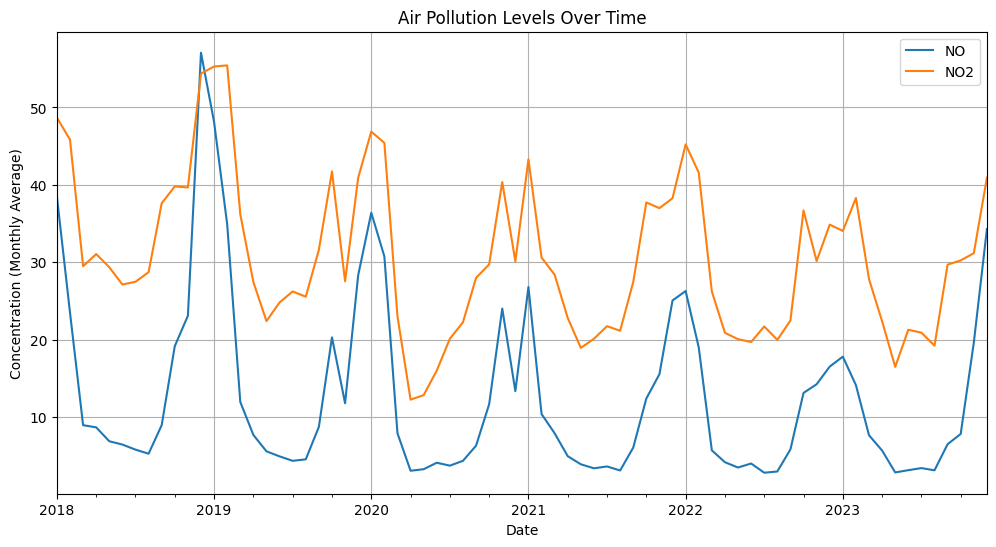

In [7]:
# Select NO and NO2, then unstack to get FECHA as index and MAGNITUD as columns
df_NO_NO2 = df_all_cleaned.loc[['NO', 'NO2']].reset_index().pivot(index='FECHA', columns='MAGNITUD', values='MEAN')

fig, ax = plt.subplots(figsize=(12, 6))
df_NO_NO2.plot(ax=ax)
plt.title('Air Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration (Monthly Average)')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Calculate and display the correlation between NO and NO2 monthly mean values
correlation = df_NO_NO2['NO'].corr(df_NO_NO2['NO2'])
print(f'Correlation between NO and NO2 monthly mean values: {correlation:.3f}')

Correlation between NO and NO2 monthly mean values: 0.904


NO2 = 0.787 * NO + 20.511


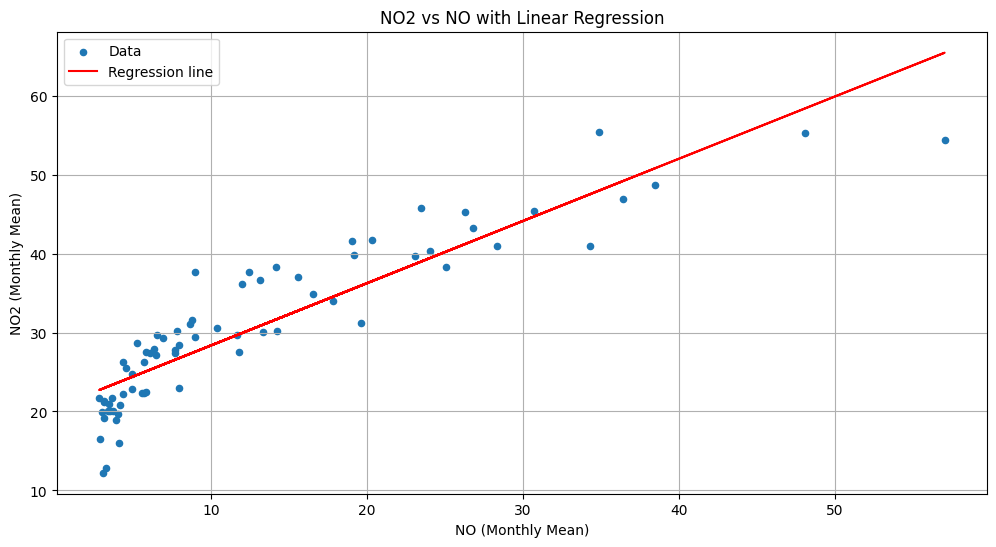

In [9]:
# Do linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_NO_NO2['NO'], df_NO_NO2['NO2'])

print(f'NO2 = {slope:.3f} * NO + {intercept:.3f}')

# Plot scatter and regression line
fig, ax = plt.subplots(figsize=(12, 6))
df_NO_NO2.plot(kind='scatter', x='NO', y='NO2', ax=ax, label='Data')
ax.plot(df_NO_NO2['NO'], slope*df_NO_NO2['NO'] + intercept, color='red', label='Regression line')
plt.title('NO2 vs NO with Linear Regression')
plt.xlabel('NO (Monthly Mean)')
plt.ylabel('NO2 (Monthly Mean)')
plt.legend()
plt.grid()
plt.show()

As we can see, NO and NO2 are strongly correlated. Lets prepare a model that can predict NO2 with only NO data. Then we will apply that model to estimate the NO2 concentration in 2024 and we will compare with real values

In [10]:
#Same input data and cleaning as 2018-2022
df2024 = pd.read_csv('Data\datos202412.csv', sep=';')

df2024['MAGNITUD'] = df2024['MAGNITUD'].map(DfMagCodes.set_index('Code')['Mag']).fillna(df2024['MAGNITUD'])

df2024_cleaned = df2024.copy()
for d_col, v_col in zip(D_cols, V_cols):
    mask = df2024_cleaned[v_col] == 'N'
    df2024_cleaned.loc[mask, d_col] = np.nan

df2024_cleaned = df2024_cleaned.groupby(['MAGNITUD', 'MES'])[D_cols].mean().reset_index().set_index(['MAGNITUD', 'MES'])
df2024_cleaned['MEAN'] = df2024_cleaned[D_cols].mean(axis=1)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juanm\AppData\Local\Temp\ipykernel_17956\3927509331.py:2: SyntaxWarning: invalid escape sequence '\d'
  df2024 = pd.read_csv('Data\datos202412.csv', sep=';')


In [11]:
#Takes the average of NO in a new DF, then predicts the NO2
dfPrediction = df2024_cleaned.loc[['NO']].reset_index().pivot(index='MES', columns='MAGNITUD', values='MEAN')
dfPrediction['Predicted_NO2'] = slope * dfPrediction['NO'] + intercept
dfPrediction['Actual_NO2'] = df2024_cleaned.loc[['NO2']].reset_index().pivot(index='MES', columns='MAGNITUD', values='MEAN')['NO2']

<Axes: xlabel='MES'>

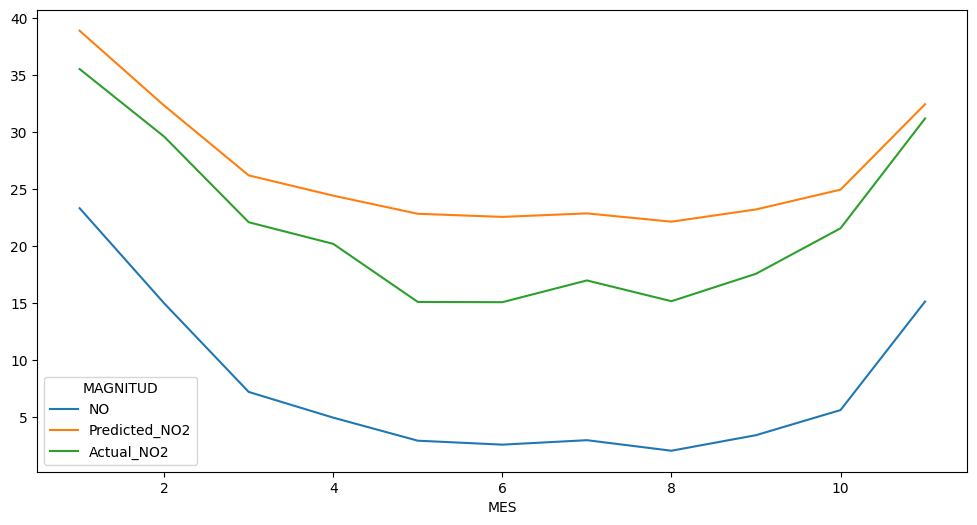

In [12]:
fig3, ax3 = plt.subplots(figsize=(12, 6))
dfPrediction.plot(kind='line', y=['NO','Predicted_NO2', 'Actual_NO2'], ax=ax3)

## Further analysis

In this section, we will explore the trends of the different DataFrame magnitudes, whether they are increasing or decreasing.

In [13]:
#Reset the index to access all columns normally
df_all_cleaned.reset_index(inplace=True)

Lets do a graph to show the evolution of all magnitudes observed.

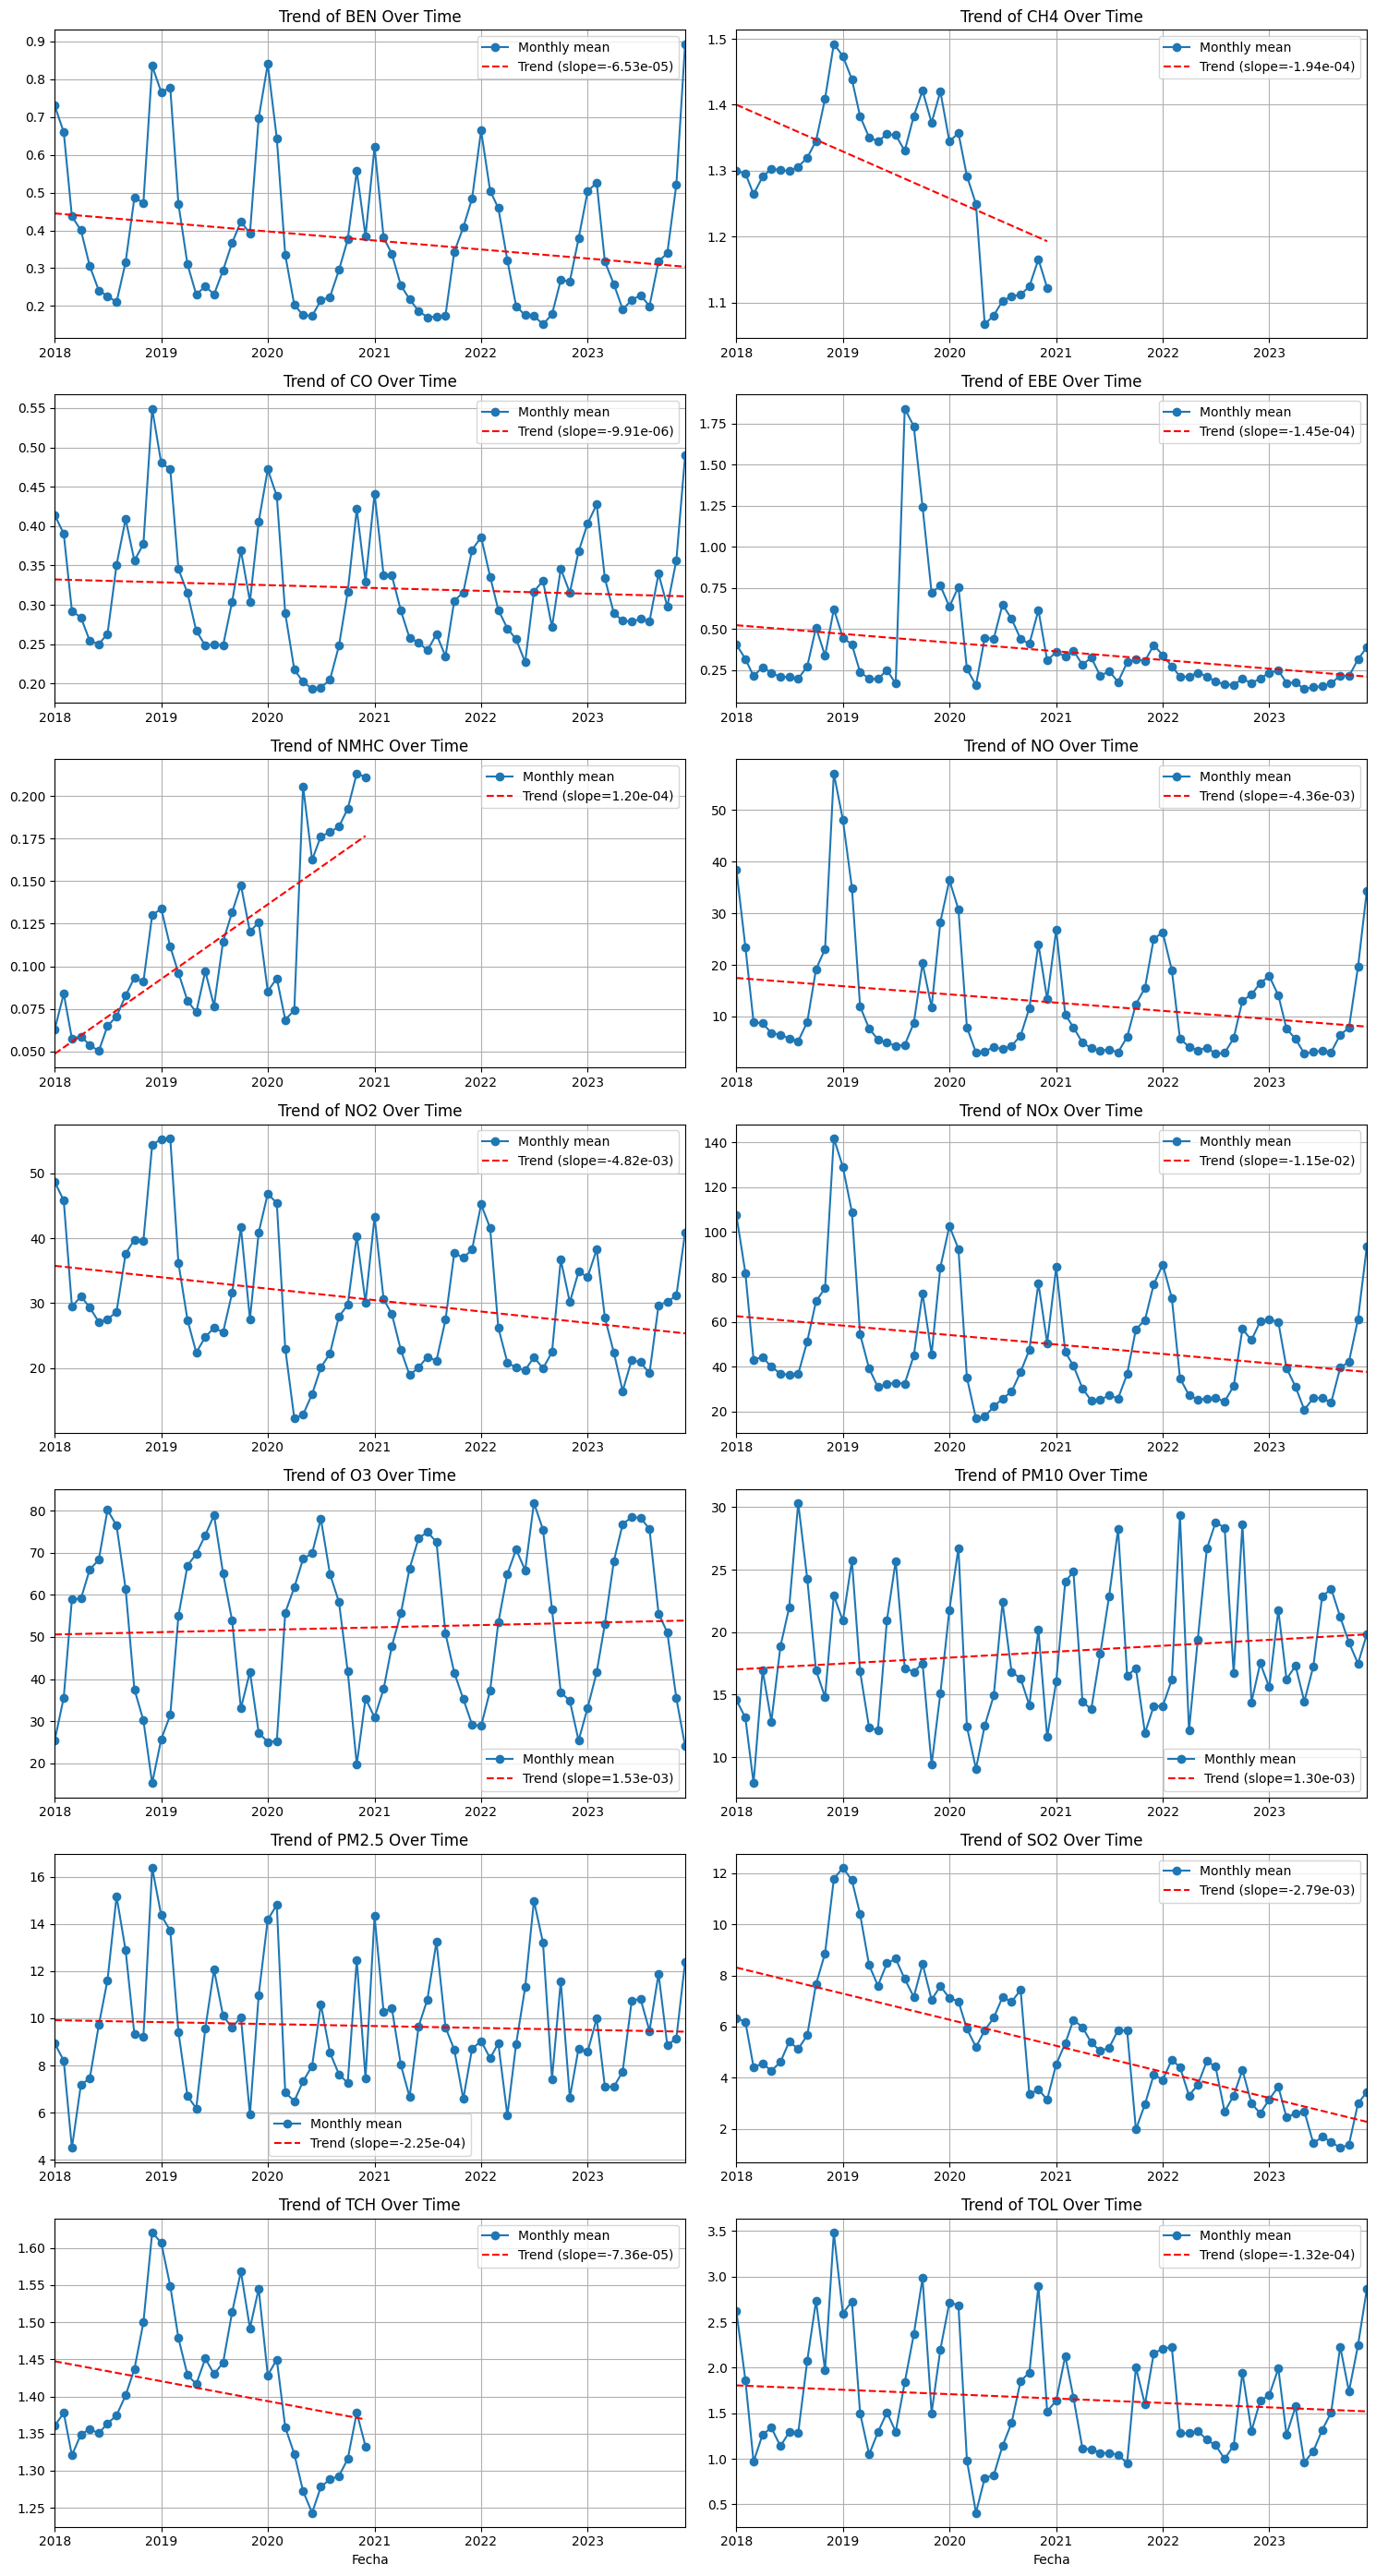

In [ ]:
# Replace the "Trend of magnitudes over the time" cell: produce 2 plots per row
magnitudes = df_all_cleaned['MAGNITUD'].unique()
size = len(magnitudes)
ncols = 2
nrows = math.ceil(size / ncols)

fig4, ax4 = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows), sharex=False)
axes = ax4.flatten()

# Define limits for x axis
xmin = df_all_cleaned["FECHA"].min()
xmax = df_all_cleaned["FECHA"].max()

for i, magnitude in enumerate(magnitudes):
    ax = axes[i]
    subset = df_all_cleaned[df_all_cleaned['MAGNITUD'] == magnitude]

    if subset.empty:
        ax.text(0.5, 0.5, f'{magnitude} not found', ha='center', va='center')
        ax.set_title(f'Trend of {magnitude} (missing)')
        ax.grid()
        continue

    ax.plot(subset['FECHA'], subset['MEAN'], marker='o', linestyle='-', label='Monthly mean')

    # convert dates to matplotlib format for regression
    x = mdates.date2num(subset["FECHA"])
    y = subset["MEAN"].values

    if len(x) >= 2:
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        y_pred = intercept + slope * x
        ax.plot(subset['FECHA'], y_pred, color='red', linestyle='--',
                label=f'Trend (slope={slope:.2e})')

    ax.legend()
    ax.set_title(f'Trend of {magnitude} Over Time')
    ax.set_xlim(xmin, xmax)
    ax.grid()

# Turn off any unused axes
for j in range(len(magnitudes), len(axes)):
    axes[j].axis('off')

# set xlabel only on bottom-row axes
for ax in axes[(nrows - 1) * ncols:]:
    ax.set_xlabel("Fecha")

plt.tight_layout()
plt.show()

As we can see, most magnitudes tend to decrease, which is a positive sign. However, the downward trend is relatively small.

## Correlation heatmap

"Correlation maps help us understand how different magnitudes affect each other. With this knowledge, we can focus on changing the magnitudes that are highly correlated with others to maximize impact, or identify magnitudes that can be altered without significantly affecting the rest."

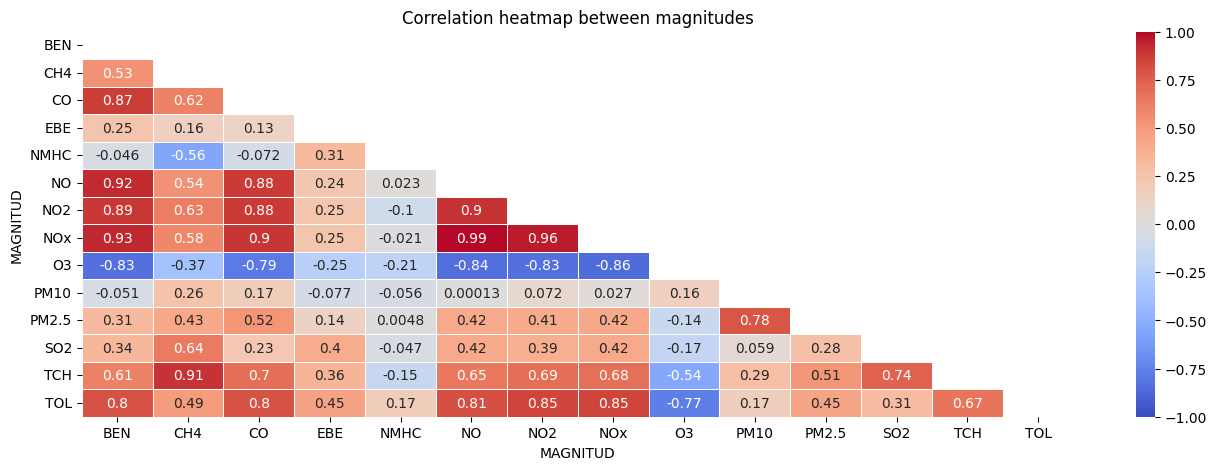

In [16]:
corr = df_all_cleaned.pivot(index="FECHA", columns="MAGNITUD", values="MEAN").corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 5))

sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation heatmap between magnitudes")
plt.show()


For example, in this heatmap we can see that NMHC has weak correlation with the other magnitudes. So in order to decrease this magnitude we need to take specific actions. On the other hand, TOL has strong correlation with NOx CO and BEN.

## Moving Average

Now we can plot the yearly moving average of certain variables. This helps us see more clearly how each one is evolving.

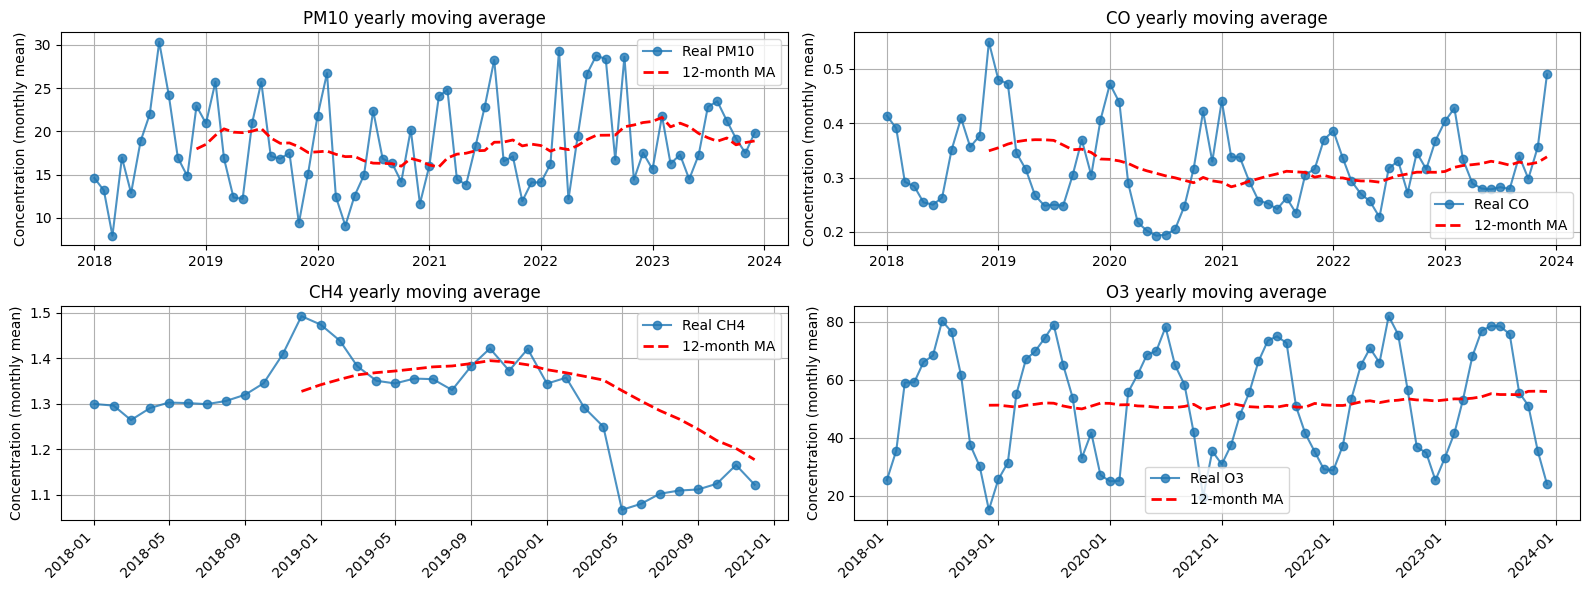

In [17]:
# Replaced last cell: moving average for multiple magnitudes in a 2x2 figure
mags = ['PM10', 'CO', 'CH4', 'O3']
fig, axes = plt.subplots(2, 2, figsize=(16, 6))
axes = axes.flatten()

for ax, mag in zip(axes, mags):
    try:
        s = df_all_cleaned.set_index(['FECHA', 'MAGNITUD']).sort_index().xs(mag, level='MAGNITUD')['MEAN']
    except KeyError:
        ax.text(0.5, 0.5, f'{mag} not found', ha='center', va='center')
        ax.set_title(f'{mag} (missing)')
        ax.grid()
        continue

    ma12 = s.rolling(window=12).mean()

    ax.plot(s.index, s, marker='o', linestyle='-', label=f'Real {mag}', alpha=0.8)
    ax.plot(ma12.index, ma12, linestyle='--', color='red', label='12-month MA', linewidth=2)
    ax.set_title(f'{mag} yearly moving average')
    ax.set_ylabel('Concentration (monthly mean)')
    ax.grid(True)
    ax.legend()

# Format x-axis dates for bottom plots
for ax in axes[2:]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

plt.tight_layout()
plt.show()